In [1]:
import umap
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2022-11-21 13:51:29.277790: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2022-11-21 13:51:29.278162: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
d = "/mnt/c/Users/trang.le/Desktop/shapemode"
PC = "PC1"
df0 = pd.read_csv(f"{d}/covar_sc/{PC}_0_intensities.csv")
#df1 = pd.read_csv(f"{d}/covar_sc/{PC}_1_intensities.csv")
df0 = df0.drop("Unnamed: 0", axis=1)
df0 = df0[df0.cell_labs != 'Multi-Location']

In [3]:
intensities = df0.iloc[:10000,254:5376].values
reducer=umap.UMAP(n_neighbors=15, min_dist= 0.1, n_components=2, metric='euclidean')
embedding = reducer.fit_transform(intensities)
embedding.shape

(10000, 2)

/home/trangle/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

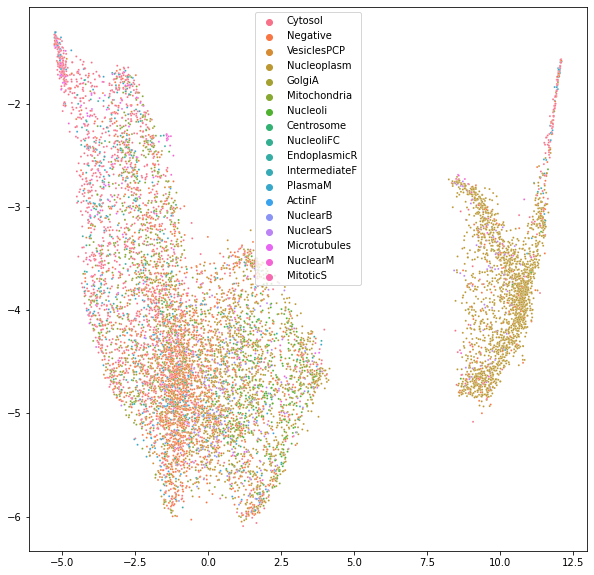

In [6]:
#plt.scatter(embedding[:,0], embedding[:,1], c=df0.cell_labs)
plt.figure(figsize=(10,10))
sns.scatterplot(embedding[:,0], embedding[:,1],
                hue=df0[df0.cell_labs != 'Multi-Location'].cell_labs[:10000].to_list(),
                alpha=1, s=4)